# Comparison of graphical methods with measured data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import package_DBR
from package_DBR import myRound, FOPDT, FOPDT_cost, SOPDT, SOPDT_cost, Bode, Process

# Import experimental data

In [2]:
# nameFile = 'Open_loop_experiment_on_DV_2021-06-09-09h39.txt'
nameFile = 'Open_loop_experiment_on_MV_2022-05-01-13h13.txt'

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'
    
print(ExpVariable)    
    
titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)
t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values


if ExpVariable == 'MV':
    tstep = np.argwhere(np.diff(MV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]    
    MVstep = MV[tstep + 1] - MV[tstep]
    MVm = MV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/MVstep
    MVm = (MVm - MVm[0])/MVstep    
else:    
    tstep = np.argwhere(np.diff(DV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]
    DVstep = DV[tstep + 1] - DV[tstep]    
    DVm = DV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/DVstep
    DVm = (DVm - DVm[0])/DVstep

MV


# Clean data

(0.0, 466.0)

<Figure size 1584x1584 with 0 Axes>

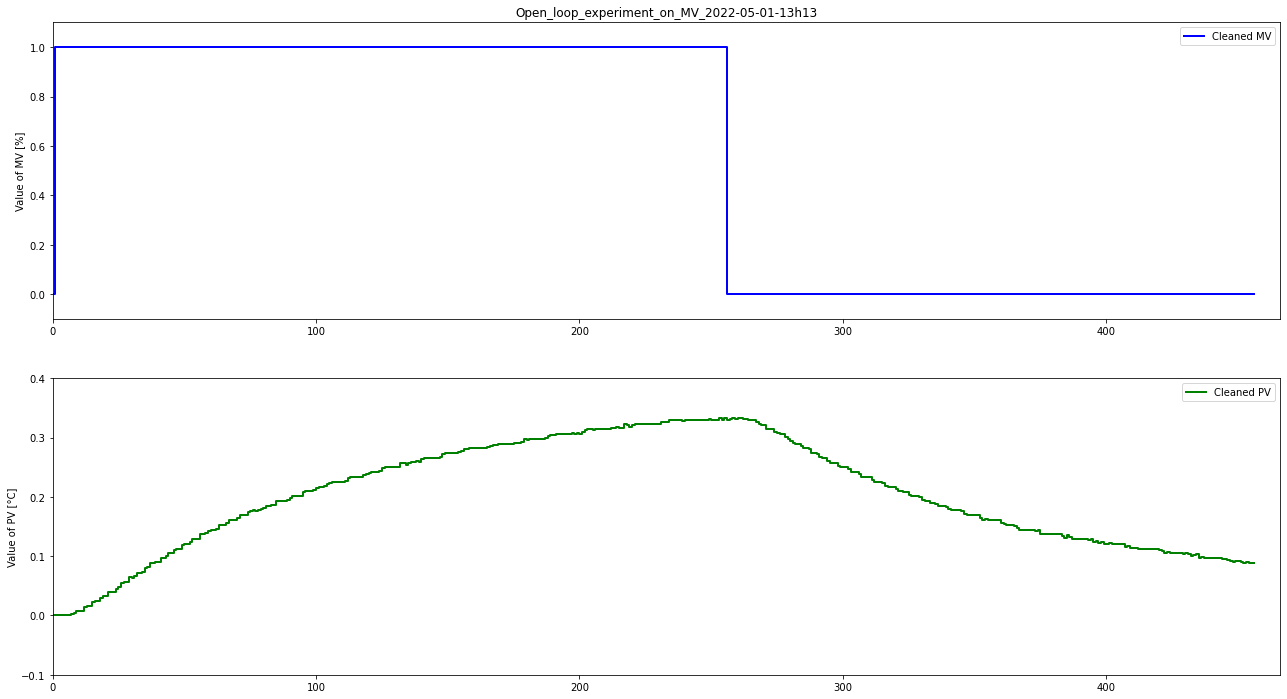

In [3]:
plt.figure(figsize = (22,22))

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)

if ExpVariable == 'MV':
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned MV',where='post')
    ax1.set_ylabel('Value of MV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,MVm)
    ax1.set_ylim(myRound(np.min(MVm),1)-0.1, myRound(np.max(MVm),1)+0.1)    
else:
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned DV',where='post')
    ax1.set_ylabel('Value of DV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,DVm)
    ax1.set_ylim(myRound(np.min(DVm),1)-0.1, myRound(np.max(DVm),1)+0.1)     

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='Cleaned PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

# Graphical methods values

In [4]:
# Results obtained:
Kp = 0.3335
a = 0.25
t1 = 40
t2 = 55
Tu = 10
Tg = 105

e = 2.71828

# Broida simple:
T_bs = Tg
theta_bs = Tu

# Broida complex:
T_bc = 5.5*(t2-t1)
theta_bc = 2.8*t1 - 1.8*t2

# van der Grinten:
T1_vdg = Tg*((3*a*e)/(1+a*e))
T2_vdg = Tg*((1-a*e)/(1+a*e))
theta_vdg = abs(Tu-((T1_vdg*T2_vdg)/(T1_vdg+3*T2_vdg)))

# Strejc: (first order)
T_s = Tg
theta_s = Tu

# FOPDT - Broida:
K_FOPDT = 0.40247556203426577
T_FOPDT = 131.1846830413941
theta_FOPDT = 3.4140379979786477
    
# SOPDT - van der Grinten
K_SOPDT = 0.39017974996590316
T1_SOPDT =  116.66713066757724
T2_SOPDT =  5.879909521258273e-05
theta_SOPDT = 8.040136543592041

# Step response comparison

(0.0, 465.0)

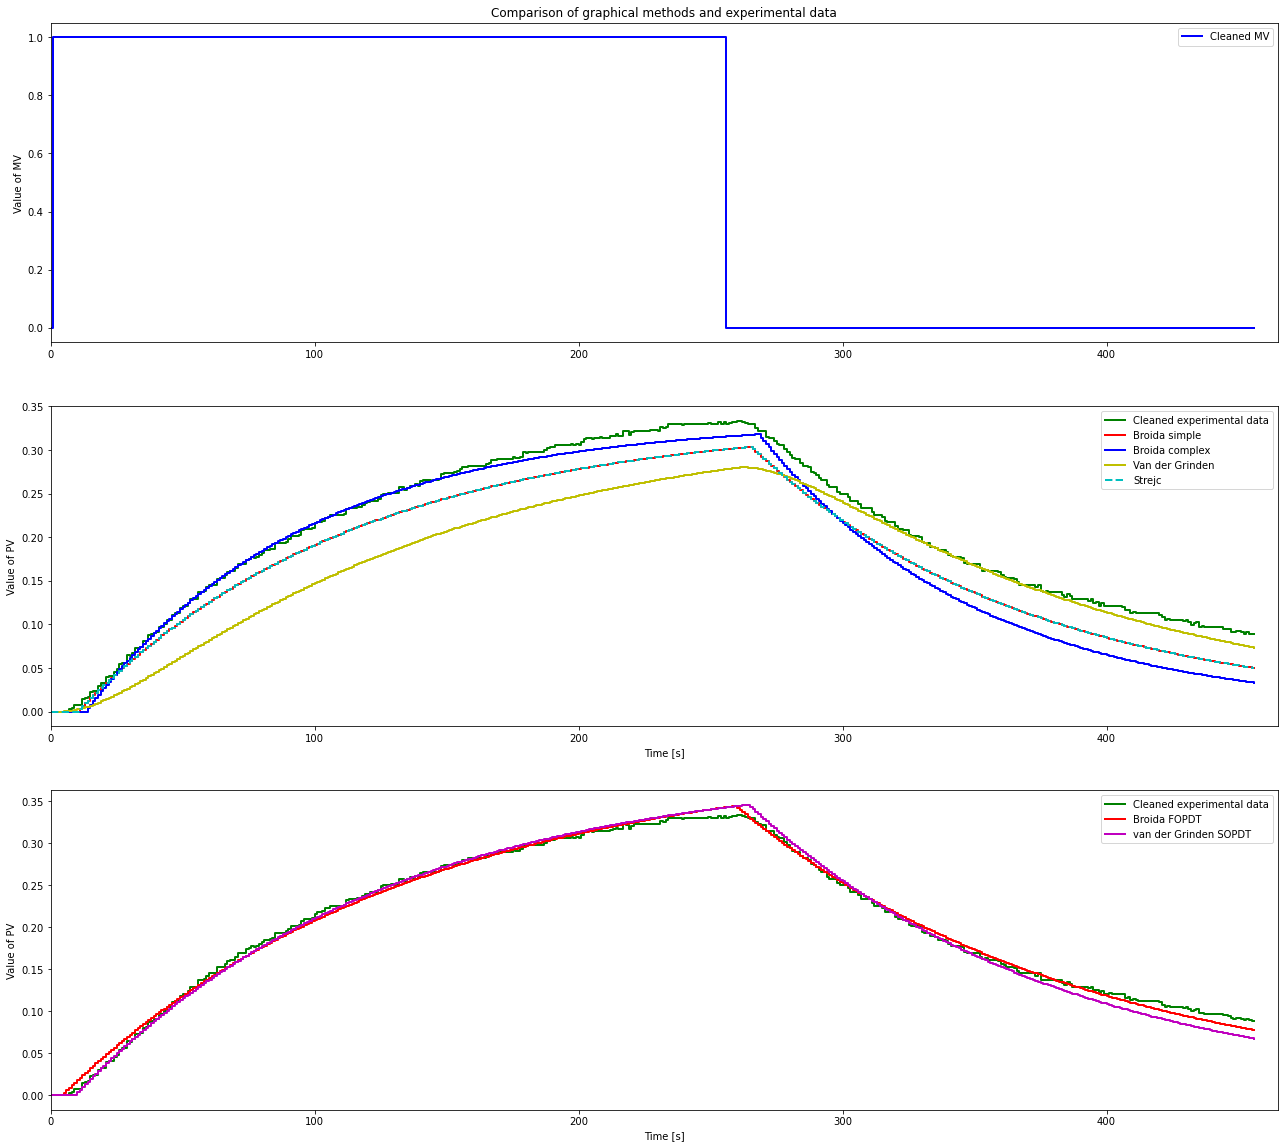

In [5]:
Ts = 1.0

broida_simple = FOPDT(MVm,Kp,T_bs,theta_bs,Ts)
broida_complex = FOPDT(MVm,Kp,T_bc,theta_bc,Ts)
VDG = SOPDT(MVm,Kp,T1_vdg,T2_vdg,theta_vdg,Ts)
strejc = SOPDT(MVm,Kp,T_s,0,theta_s,Ts)
broida_FOPDT = FOPDT(MVm,K_FOPDT,T_FOPDT,theta_FOPDT,Ts)
VDG_SOPDT = SOPDT(MVm,K_SOPDT,T1_SOPDT,T2_SOPDT,theta_SOPDT,Ts)

plt.figure(figsize = (22,20))

plt.subplot(3,1,1)
if ExpVariable == 'MV':
    plt.step(tm,MVm,'b-',linewidth=2,label='Cleaned MV',where='post')
    plt.ylabel('Value of MV')
else:
    plt.step(tm,DVm,'b-',linewidth=2,label='Cleaned DV',where='post')
    plt.ylabel('Value of DV') 
    
plt.title('Comparison of graphical methods and experimental data')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

plt.subplot(3,1,2)
plt.step(tm,PVm,'g-',linewidth=2,label='Cleaned experimental data',where='post')
plt.step(tm,broida_simple,'r-',linewidth=2,label='Broida simple',where='post')
plt.step(tm,broida_complex,'b-',linewidth=2,label='Broida complex',where='post')
plt.step(tm,VDG,'y-',linewidth=2,label='Van der Grinden',where='post')
plt.step(tm,strejc,'c--',linewidth=2,label='Strejc',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

plt.subplot(3,1,3)
plt.step(tm,PVm,'g-',linewidth=2,label='Cleaned experimental data',where='post')
plt.step(tm,broida_FOPDT,'r-',linewidth=2,label='Broida FOPDT',where='post')
plt.step(tm,VDG_SOPDT,'m-',linewidth=2,label='van der Grinden SOPDT',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

# Comparison in the frequency domain

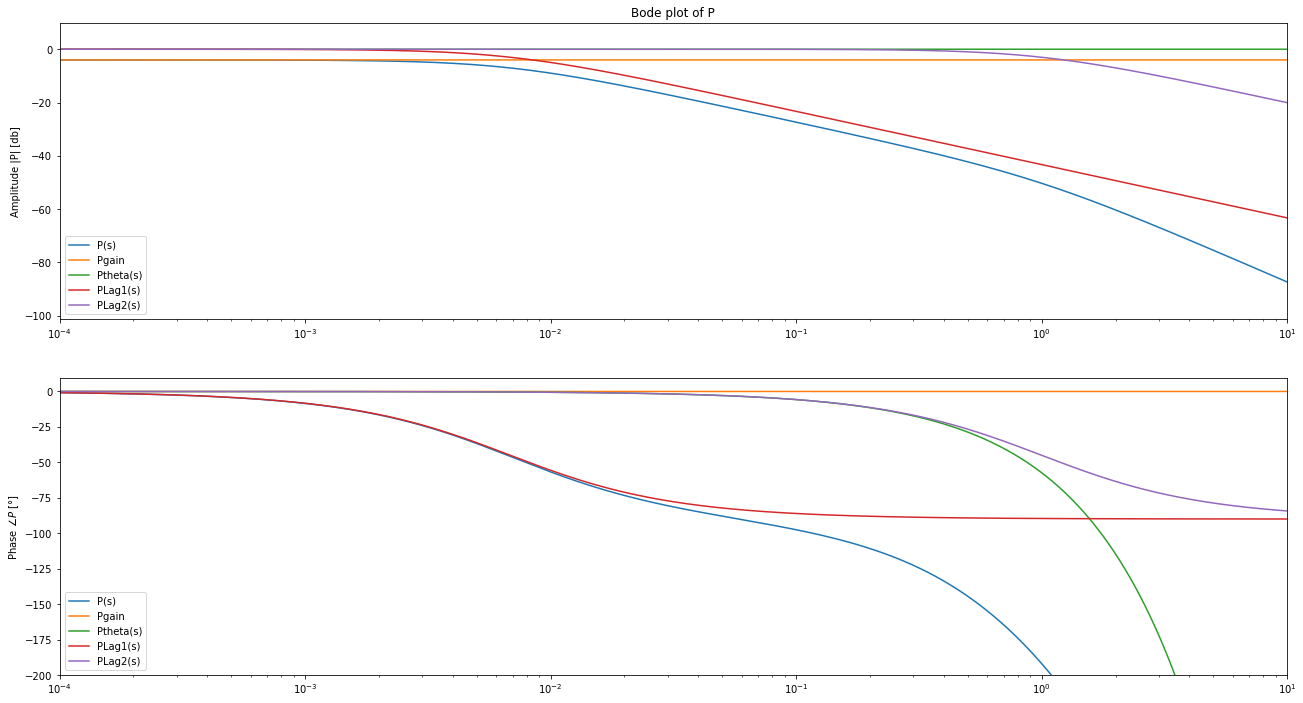

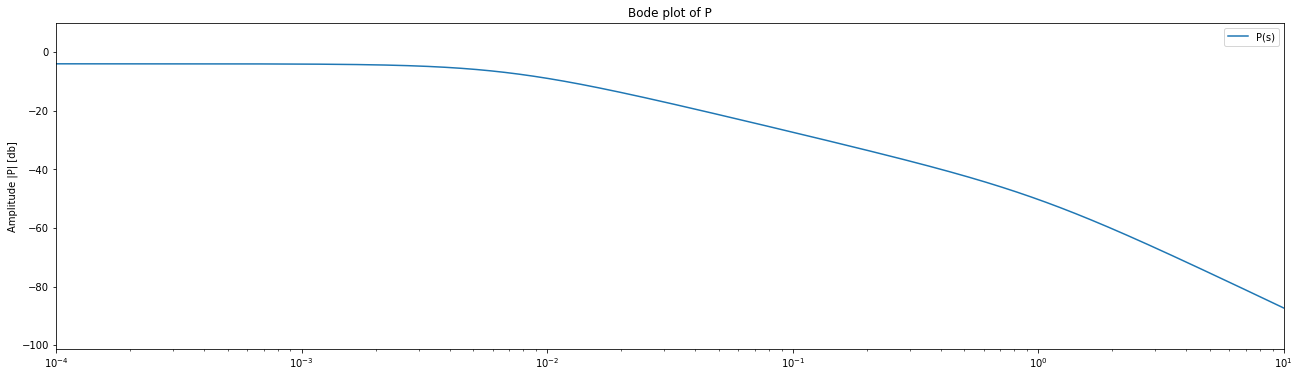

In [22]:
P = Process({}) # Default process = unit gain

# Parameters for input-output dynamics P(s)
P.parameters['Kp'] = 0.63
P.parameters['Tlag1'] = 146.0
P.parameters['Tlag2'] = 1.0
P.parameters['theta'] = 1.0

omega = np.logspace(-4, 1, 10000)

Bode(P,omega)

Ps = Bode(P,omega,Show=False)

plt.figure(figsize = (22,12))

plt.subplot(2,1,1)
plt.semilogx(omega,20*np.log10(np.abs(Ps)),label='P(s)')
gain_min = np.min(20*np.log10(np.abs(Ps)/5))
gain_max = np.max(20*np.log10(np.abs(Ps)*5))
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([gain_min, gain_max])
plt.ylabel('Amplitude |P| [db]')
plt.title('Bode plot of P')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps)),label='P(s)')
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(PGain)),label='Pgain')